In [25]:
import numpy as np 
import pandas as pd
from sklearn import datasets

In [26]:
iris=datasets.load_iris()

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [30]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
x=iris.data[:,0:4]
y=iris.target

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [34]:
clas= KNeighborsClassifier(n_neighbors=5)

In [35]:
clas.fit(xtrain,ytrain)

KNeighborsClassifier()

In [36]:
yh=clas.predict(xtest)

In [37]:
print('accuacry score is ',accuracy_score(ytest,yh))

accuacry score is  0.9777777777777777


In [38]:
from sklearn.metrics import confusion_matrix


In [39]:
print('accuacry score is ',confusion_matrix(ytest,yh))

accuacry score is  [[17  0  0]
 [ 0 18  0]
 [ 0  1  9]]


In [40]:
df['species'] = iris.target

In [41]:
corr_matrix=df.corr()

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

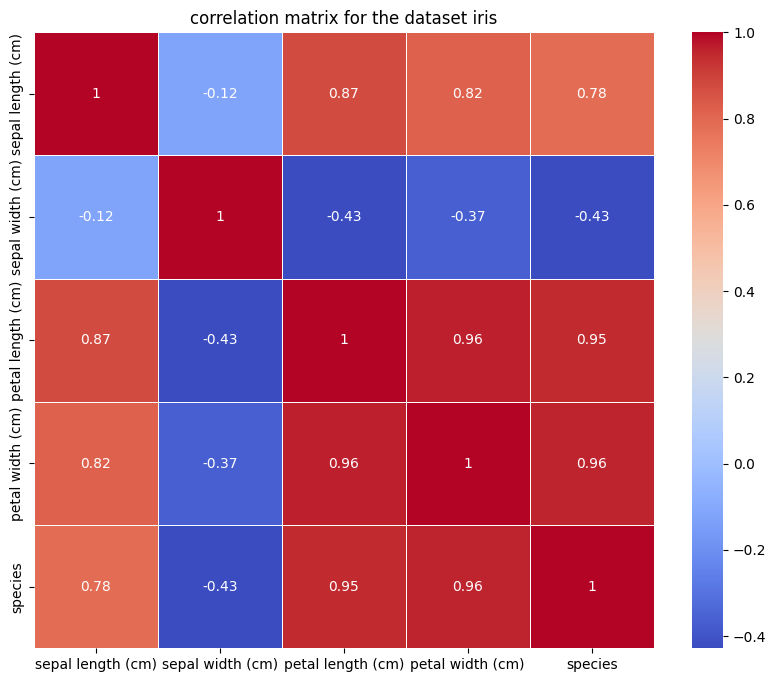

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('correlation matrix for the dataset iris')
plt.show

minim error is 0.022222222222222223 at k= 0
max accuracy is 0.9777777777777777 at k= 0


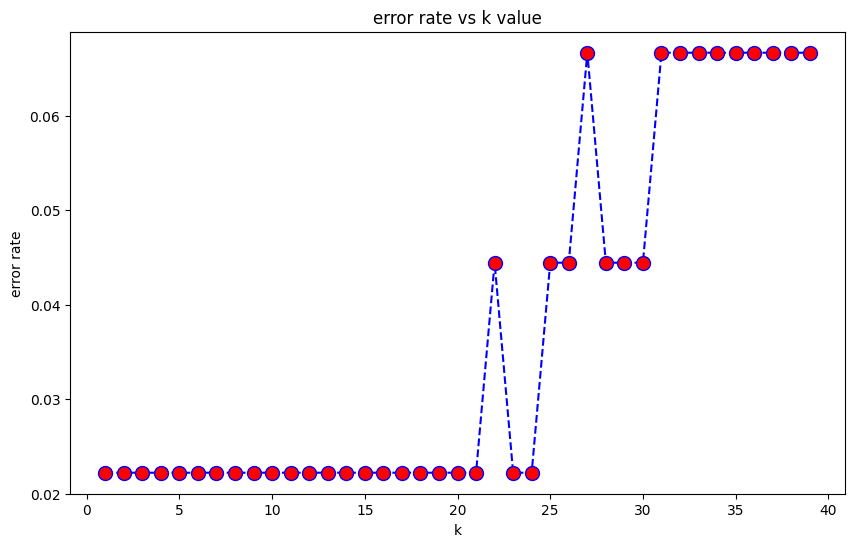

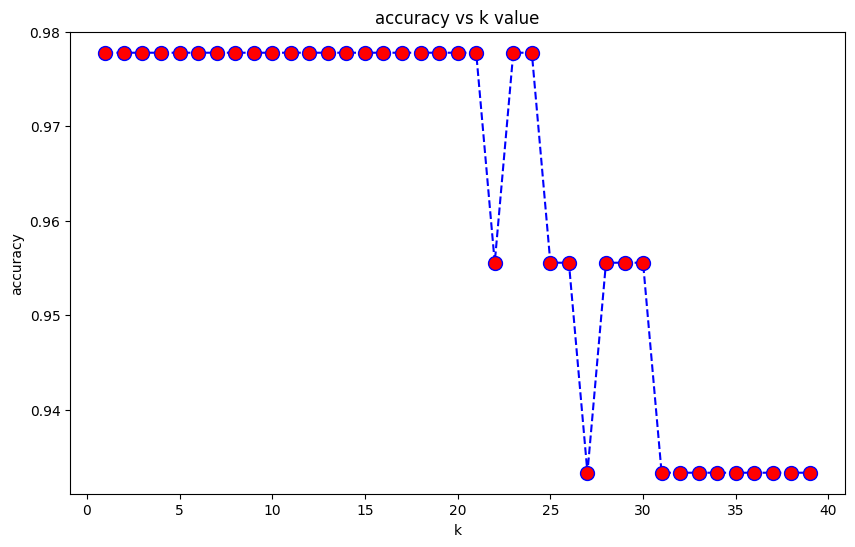

In [49]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    error_rate.append(np.mean(pred_i!=ytest))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error rate')
print('minim error is',min(error_rate),'at k=',error_rate.index(min(error_rate)))
acc=[]
from sklearn.metrics import accuracy_score
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i=knn.predict(xtest)
    acc.append(accuracy_score(ytest,pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy vs k value')

plt.xlabel('k')
plt.ylabel('accuracy')
print('max accuracy is',max(acc),'at k=',acc.index(max(acc)))
